## Timing of (truncated) contagion maps

In [1]:
%load_ext autoreload
%autoreload 2

import cmap as conmap
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_theme()
import pandas as pd

# For pretty colourmaps
import palettable
from matplotlib.colors import ListedColormap

sns.set_style("white")

import time


### In dependence of the network size $N$

## Timing the calculations

In [14]:
N_vec = 10**np.arange(1.5,4,0.25)
N_vec = N_vec.astype(int)

t=0.3

truncatedMapTime = []
fullMapTime = []

# time the execution of the maps
for N in N_vec:
    print(N)
    # network construction
    noisyRL = conmap.constructNoisyRingLattice(numberNodes=N,geometricDegree=6,nongeometricDegree=2)
    print('network constructed')
    # time the trunctated map
    start = time.time()
    contagionMap = conmap.runTruncatedContagionMap(noisyRL,threshold=t,numberSteps=20,symmetric=True)
    end = time.time()
    truncatedMapTime.append(end-start)

    # time the fill map
    start = time.time()
    contagionMap = conmap.runTruncatedContagionMap(noisyRL,threshold=t,symmetric=True)
    end = time.time()
    fullMapTime.append(end-start)

31
failed adding of non-geometric edges: restart
network constructed
56
failed adding of non-geometric edges: restart
network constructed
100
failed adding of non-geometric edges: restart
network constructed
177
network constructed
316
network constructed
562
network constructed
1000
network constructed
1778
network constructed
3162
network constructed
5623
network constructed


In [15]:
# fit powerlaw to data
from scipy.optimize import curve_fit

def func_powerlaw(_offsetx, m, c, c0):
    return c0 + x**m * c

def func_powerlaw(x, m, c):
    return (x**m) * c

fittedValues_fullmap, pcov = curve_fit(func_powerlaw, N_vec, fullMapTime, maxfev=2000 )
fittedValues_truncatedmap, pcov = curve_fit(func_powerlaw, N_vec, truncatedMapTime, maxfev=2000 )





## Plotting

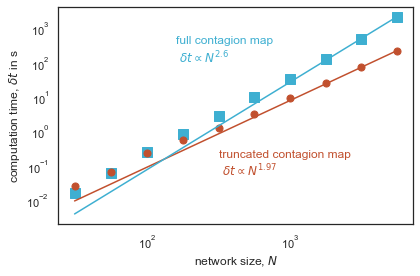

In [16]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(N_vec,fullMapTime,color='#3eafd1',s=100,marker='s')
plt.scatter(N_vec,truncatedMapTime,color='#c1502e',s=50,marker='o')

ax.set_yscale('log')
ax.set_xscale('log')

# add fit lines
plt.plot(N_vec, func_powerlaw(N_vec, fittedValues_truncatedmap[0], fittedValues_truncatedmap[1]), '-',color='#c1502e')
plt.plot(N_vec, func_powerlaw(N_vec, fittedValues_fullmap[0], fittedValues_fullmap[1]), '-',color='#3eafd1')
plt.xlabel('network size, $N$')
plt.ylabel('computation time, $\delta t$ in s')

# add labels
plt.text(10**2.2,10**2,'full contagion map\n $\delta t \propto N^{2.6}$',color='#3eafd1')
plt.text(10**2.5,0.05,'truncated contagion map\n $\delta t \propto N^{1.97}$',color='#c1502e')
plt.tight_layout()

plt.savefig('./figures/Fig7-computationalComplexityTruncatedContagion.pdf')



## In dependence of the scaling parameter $s$

In [54]:
N=10000

#s_vec = np.arange(10,N,20)
#s_vec = np.arange(10,N,round((N-10)/6))
s_vec = 10**np.arange(1,3,0.25)
s_vec = s_vec.astype(int)



t=0.3

truncatedMapTime = []
fullMapTime = []

# time the execution of the maps
for s in s_vec:
    print(s)
    # network construction
    noisyRL = conmap.constructNoisyRingLattice(numberNodes=N,geometricDegree=6,nongeometricDegree=2)
    print('network constructed')
    # time the trunctated map
    start = time.time()
    contagionMap = conmap.runTruncatedContagionMap(noisyRL,threshold=t,numberSteps=s,symmetric=True)
    end = time.time()
    truncatedMapTime.append(end-start)
print('full map')
# time the full map only once
start = time.time()
contagionMap = conmap.runTruncatedContagionMap(noisyRL,threshold=t,symmetric=True)
end = time.time()
fullMapTime.append(end-start)

10
network constructed
17
network constructed
31
network constructed
56
network constructed
100
network constructed
177
network constructed
316
network constructed
562
network constructed
full map


In [55]:
# fit powerlaw to data
from scipy.optimize import curve_fit

def func_powerlaw(_offsetx, m, c, c0):
    return c0 + x**m * c

def func_powerlaw(x, m, c):
    return (x**m) * c

#fittedValues_fullmap, pcov = curve_fit(func_powerlaw, N_vec, fullMapTime, maxfev=2000 )
fittedValues_truncatedmap, pcov = curve_fit(func_powerlaw, s_vec, truncatedMapTime, maxfev=2000 )





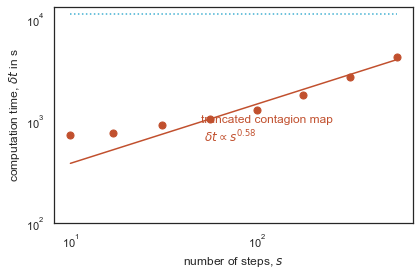

In [78]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#plt.scatter(s_vec,fullMapTime,color='#3eafd1',s=100,marker='s')
plt.scatter(s_vec,truncatedMapTime,color='#c1502e',s=50,marker='o')

plt.hlines(fullMapTime[0],s_vec[0],s_vec[-1],color='#3eafd1',linestyle=':')


ax.set_yscale('log')
ax.set_xscale('log')

# # add fit lines
plt.plot(s_vec, func_powerlaw(s_vec, fittedValues_truncatedmap[0], fittedValues_truncatedmap[1]), '-',color='#c1502e')
# plt.plot(N_vec, func_powerlaw(N_vec, fittedValues_fullmap[0], fittedValues_fullmap[1]), '-',color='#3eafd1')
plt.xlabel('number of steps, $s$')
plt.ylabel('computation time, $\delta t$ in s')


plt.yticks([10**2,10**3,10**4])


# # add labels
plt.text(10**1,10**3.9,'full contagion map\n $\delta t \cancel{\propto} s$',color='#3eafd1')
plt.text(10**1.7,10**2.8,'truncated contagion map\n $\delta t \propto s^{0.58}$',color='#c1502e')
plt.tight_layout()

#plt.savefig('./figures/Fig7-computationalComplexityTruncatedContagion.pdf')



In [57]:
fittedValues_truncatedmap

array([  0.5819608 , 100.87272928])

In [67]:
truncatedMapTime

[731.5897650718689,
 763.5492129325867,
 922.081481218338,
 1054.050409078598,
 1286.4366538524628,
 1786.190927028656,
 2709.5814530849457,
 4240.196256637573]

In [74]:
fullMapTime

[11211.15835905075]